In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
dfday = pd.read_pickle('../../data/time_ecom/dfday.pkl')
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 1 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      137 non-null    datetime64[ns]
 1   y       137 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [4]:
dfday.tail(3)

,ds,y
135,2015-09-14,173
136,2015-09-15,145
137,2015-09-16,111


In [27]:
# default = changepoint_prior_scale=0.05  (increasing adds flexibility)
m = Prophet(changepoint_prior_scale=0.05)
m.fit(dfday)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
dffuture = m.make_future_dataframe(periods=28)
dffuture.tail(3)

,ds
162,2015-10-12
163,2015-10-13
164,2015-10-14


In [28]:
dfforecast = m.predict(dffuture)
dfforecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
160,2015-10-10,140.849073,27.813870,115.342644,140.132946,141.648933,-69.189029,-69.189029,-69.189029,-69.189029,-69.189029,-69.189029,0.0,0.0,0.0,71.660044
161,2015-10-11,140.528951,48.158359,135.920950,139.752551,141.385147,-48.638692,-48.638692,-48.638692,-48.638692,-48.638692,-48.638692,0.0,0.0,0.0,91.890259
162,2015-10-12,140.208830,135.096523,219.745921,139.401199,141.109128,37.772659,37.772659,37.772659,37.772659,37.772659,37.772659,0.0,0.0,0.0,177.981489
163,2015-10-13,139.888709,131.906182,216.890854,139.041665,140.843165,33.580770,33.580770,33.580770,33.580770,33.580770,33.580770,0.0,0.0,0.0,173.469478
164,2015-10-14,139.568587,141.070050,226.316135,138.655660,140.588589,45.645804,45.645804,45.645804,45.645804,45.645804,45.645804,0.0,0.0,0.0,185.214391


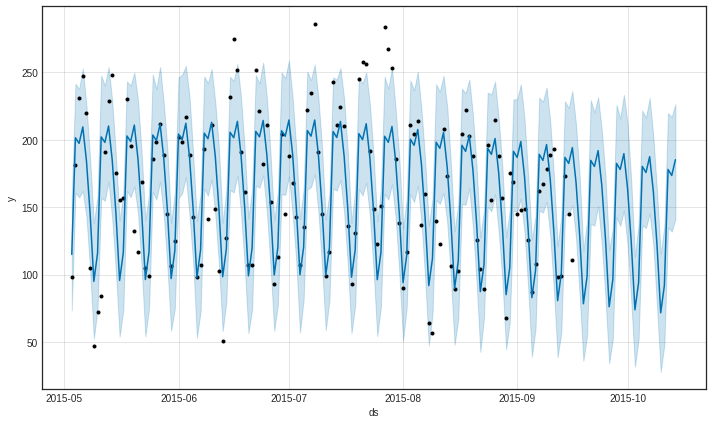

In [29]:
# plt.style.use('seaborn-white')  # didnt change prophet chart
fig1 = m.plot(dfforecast)
# fig1.savefig('../img/fb_plot_def.png')

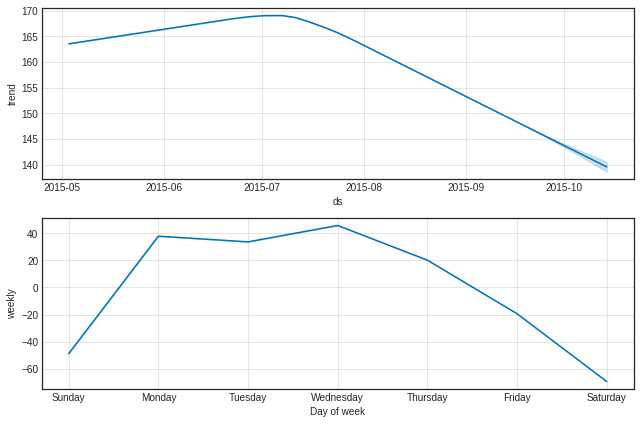

In [30]:
fig2 = m.plot_components(dfforecast)
# fig2.savefig('../img/fb_comp_def.png')

In [ ]:
def day_train_test(df):
    pass